In [21]:
import MutationalSignatures.compiled_functions as cf
from MutationalSignatures.SignatureMatrix import SignatureMatrix

from MutationalSignatures.SignaturePreprocessor import SignaturePreprocessor 
from MutationalSignatures.SignatureVisualiser import SignatureVisualiser  
from MutationalSignatures.SignatureValidator import SignatureValidator  

import matplotlib
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run Model

In [23]:
sig_matrix = SignatureMatrix(multiAlignmentPath=None, 
                                refPath="/home4/2191618l/Github/Signatures_Julia/Resources/References/GISAID_REFERENCE.gb", 
                                trinucleotide_file = "../../Outputs/October_2022_Filtered/normalised_signature_matrix.csv")
sig_matrix.addMetadata()

In [10]:
valid_weeks = sig_matrix.get_trinucleotide_matrix_metadata().epi_week.value_counts()[sig_matrix.get_trinucleotide_matrix_metadata().epi_week.value_counts()>500]
meta = sig_matrix.get_trinucleotide_matrix_metadata()[sig_matrix.get_trinucleotide_matrix_metadata().epi_week.isin(valid_weeks.index)]
data = sig_matrix.get_trinucleotide_matrix()[sig_matrix.get_trinucleotide_matrix_metadata().epi_week.isin(valid_weeks.index)]

In [11]:
def get_sequence_from_genbank(genbank_file):
    with open(genbank_file, "r") as handle:
        record = SeqIO.read(handle, "genbank")
    return record.seq

In [12]:
from Bio import SeqIO
seq = str(get_sequence_from_genbank('/home4/2191618l/Github/Signatures_Julia/Resources/References/GISAID_REFERENCE.gb'))
trimer_composition = {}

for i in range(3,len(seq)):
    if seq[i-3:i] not in trimer_composition:
        trimer_composition[seq[i-3:i]] = 1
    else:
        trimer_composition[seq[i-3:i]]+=1
compositions = pd.DataFrame(trimer_composition,index=[0])
compositions
composition_dataframe=pd.merge(pd.DataFrame([data.columns.str[:2],data.columns.str[3:]]).T,pd.DataFrame(compositions).T,left_on=1,right_index=True)
composition_dataframe.index = composition_dataframe['0_x']+'-'+composition_dataframe[1]
composition_dataframe = composition_dataframe.drop(['0_x',1],axis=1)
composition_series = pd.Series(composition_dataframe['0_y'],composition_dataframe.index,name='index').sort_index()
composition_series = composition_series
composition_series

AC-AAA     922
AC-AAC     615
AC-AAG     580
AC-AAT     761
AC-CAA     703
          ... 
TG-GTT     700
TG-TTA     876
TG-TTC     518
TG-TTG     817
TG-TTT    1004
Name: index, Length: 192, dtype: int64

In [13]:
sub_map =  {'AC':"mediumorchid",'AG':"orange", 'AT':"brown", 'CA':'#04BBEC','CG':'black','CT':'#E42824','GA':"teal", 'GC':"gold", 'GT':"mediumblue",'TA':'grey','TC':'#A0CF63','TG':'#EEC4C4'}

<AxesSubplot:>

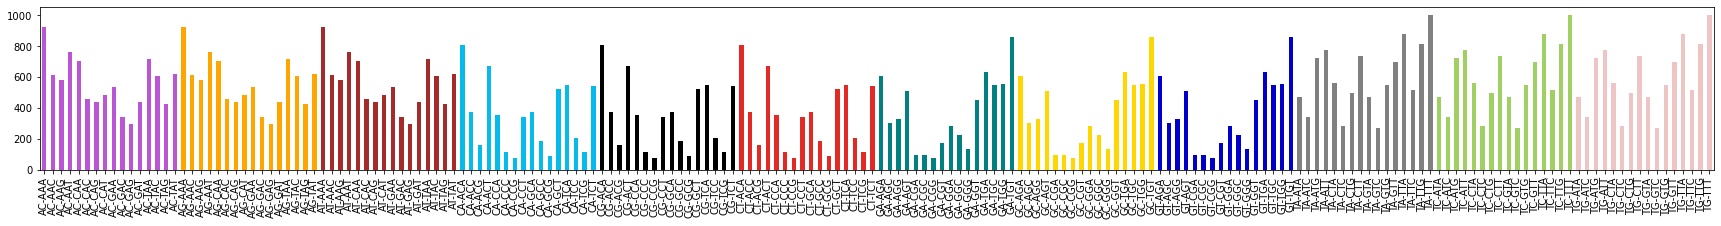

In [14]:
fig,ax = plt.subplots(figsize=[30,3])
composition_series.plot(kind="bar",color = [sub_map[key] for key in composition_series.index.str[:2]])

In [15]:
data = data/composition_series

<AxesSubplot:>

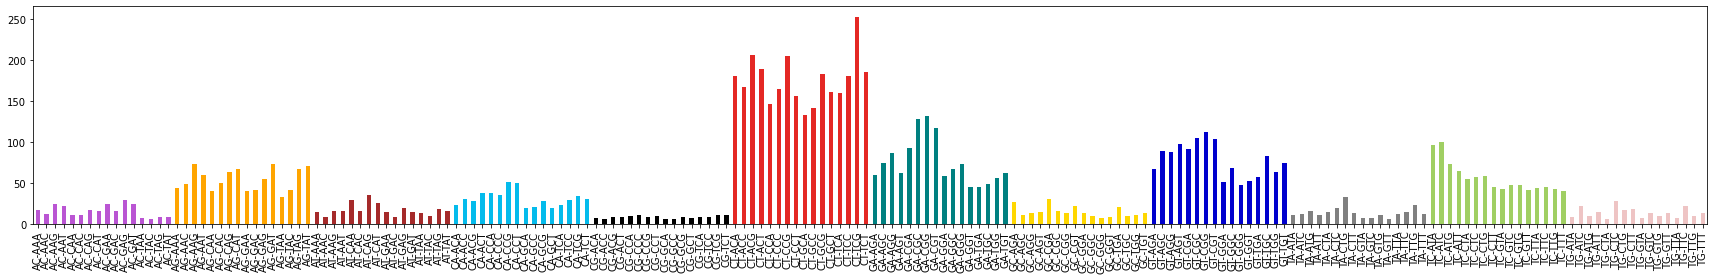

In [16]:
fig,ax = plt.subplots(figsize=[30,4])
data.sum().plot(kind="bar",color = [sub_map[key] for key in composition_series.index.str[:2]])

# Remove Hypermutated Sequences

In [17]:
sig_val = SignatureValidator(data = data,
                             metadata = meta,
                             percentages=False,
                             pseudosample_on=["epi_week"],
                             cluster_distance="cosine",
                            traditional=True)

In [ ]:
sig_val.construct_replicates(MIN_N = 2, MAX_N = 11, iterations = 100 )

N=2, iteration=0
N=2, iteration=1
N=2, iteration=2
N=2, iteration=3
N=2, iteration=4
N=2, iteration=5
N=2, iteration=6
N=2, iteration=7
N=2, iteration=8
N=2, iteration=9
N=2, iteration=10
N=2, iteration=11
N=2, iteration=12
N=2, iteration=13
N=2, iteration=14
N=2, iteration=15
N=2, iteration=16
N=2, iteration=17
N=2, iteration=18
N=2, iteration=19
N=2, iteration=20
N=2, iteration=21
N=2, iteration=22
N=2, iteration=23
N=2, iteration=24
N=2, iteration=25
N=2, iteration=26
N=2, iteration=27
N=2, iteration=28
N=2, iteration=29
N=2, iteration=30
N=2, iteration=31
N=2, iteration=32
N=2, iteration=33
N=2, iteration=34
N=2, iteration=35
N=2, iteration=36
N=2, iteration=37
N=2, iteration=38
N=2, iteration=39
N=2, iteration=40
N=2, iteration=41
N=2, iteration=42
N=2, iteration=43
N=2, iteration=44
N=2, iteration=45
N=2, iteration=46
N=2, iteration=47
N=2, iteration=48
N=2, iteration=49
N=2, iteration=50
N=2, iteration=51
N=2, iteration=52
N=2, iteration=53
N=2, iteration=54
N=2, iteration=55
N=

# Metrics

In [24]:
Signature_Metrics = sig_val.metrics()
Signature_Metrics

{'Silhouette Score for N Signatures': [0.9835156386911499,
  0.9782663520755193,
  0.7643284508239155,
  0.6022308949126812,
  0.7054298739274372,
  0.6034369355635991,
  0.6125614719272253,
  0.569331432601426,
  0.5669756790337728],
 'Reconstruction Error for N Clusters': [9.926685672963353,
  7.957732643747788,
  7.412257724326006,
  6.934972404026485,
  6.494135733440329,
  6.140937922592232,
  5.807835404567153,
  5.499596177406935,
  5.24023511860377],
 'Silhouette Score Per Cluster':           2         3         4         5         6         7         8  \
 0  0.998274  0.972328  0.929524  0.967317  0.852554  0.816271  0.317913   
 1  0.968758  0.965213  0.940004  0.291138  0.675613  0.062254  0.645002   
 2       NaN  0.997258  0.597662 -0.020469  0.590918  0.920919  0.911244   
 3       NaN       NaN  0.574825  0.943702  0.671999  0.958974  0.959970   
 4       NaN       NaN       NaN  0.907701  0.937514  0.534737  0.577438   
 5       NaN       NaN       NaN       NaN  0.386

Text(0, 0.5, 'Reconstruction Error')

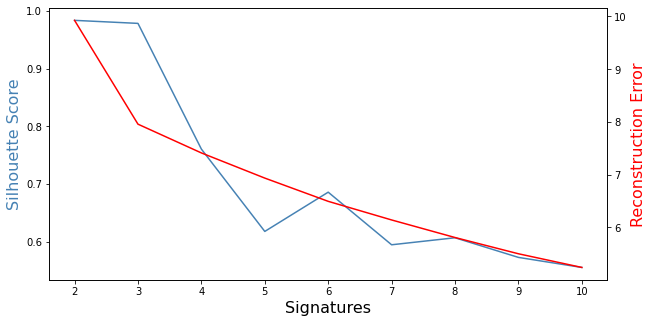

In [26]:
import matplotlib.pyplot as plt
silhouettes = Signature_Metrics["Silhouette Score Per Cluster"].mean()
reconstruction_error = pd.Series(index =range(2,11), data=Signature_Metrics["Reconstruction Error for N Clusters"])

#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=[10,5])

#add first line to plot
ax.plot(silhouettes.index, silhouettes.values, color=col1)

#add x-axis label
ax.set_xlabel('Signatures', fontsize=16)

#add y-axis label
ax.set_ylabel('Silhouette Score', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(silhouettes.index, reconstruction_error.values, color=col2)

#add second y-axis label
ax2.set_ylabel('Reconstruction Error', color=col2, fontsize=16)

In [141]:
N=4

In [142]:
sig_val.results(N)

,Cluster,Cosine,Silhouette
Signature,,,
0,0.0,0.982781,0.940004
1,1.0,0.989317,0.929524
2,2.0,0.992044,0.597662
3,3.0,0.963384,0.574825


In [119]:
all_results = []
for i in range(100):
    all_results.append(sig_val.results(N))
all_results = pd.concat(all_results)

In [120]:
all_results.groupby("Signature").mean().Cosine.mean()

0.9810471990940927

In [121]:
all_results.groupby("Signature").mean().Silhouette.mean()

0.7598057831565067

# Signatures Extracted from True Catalogue

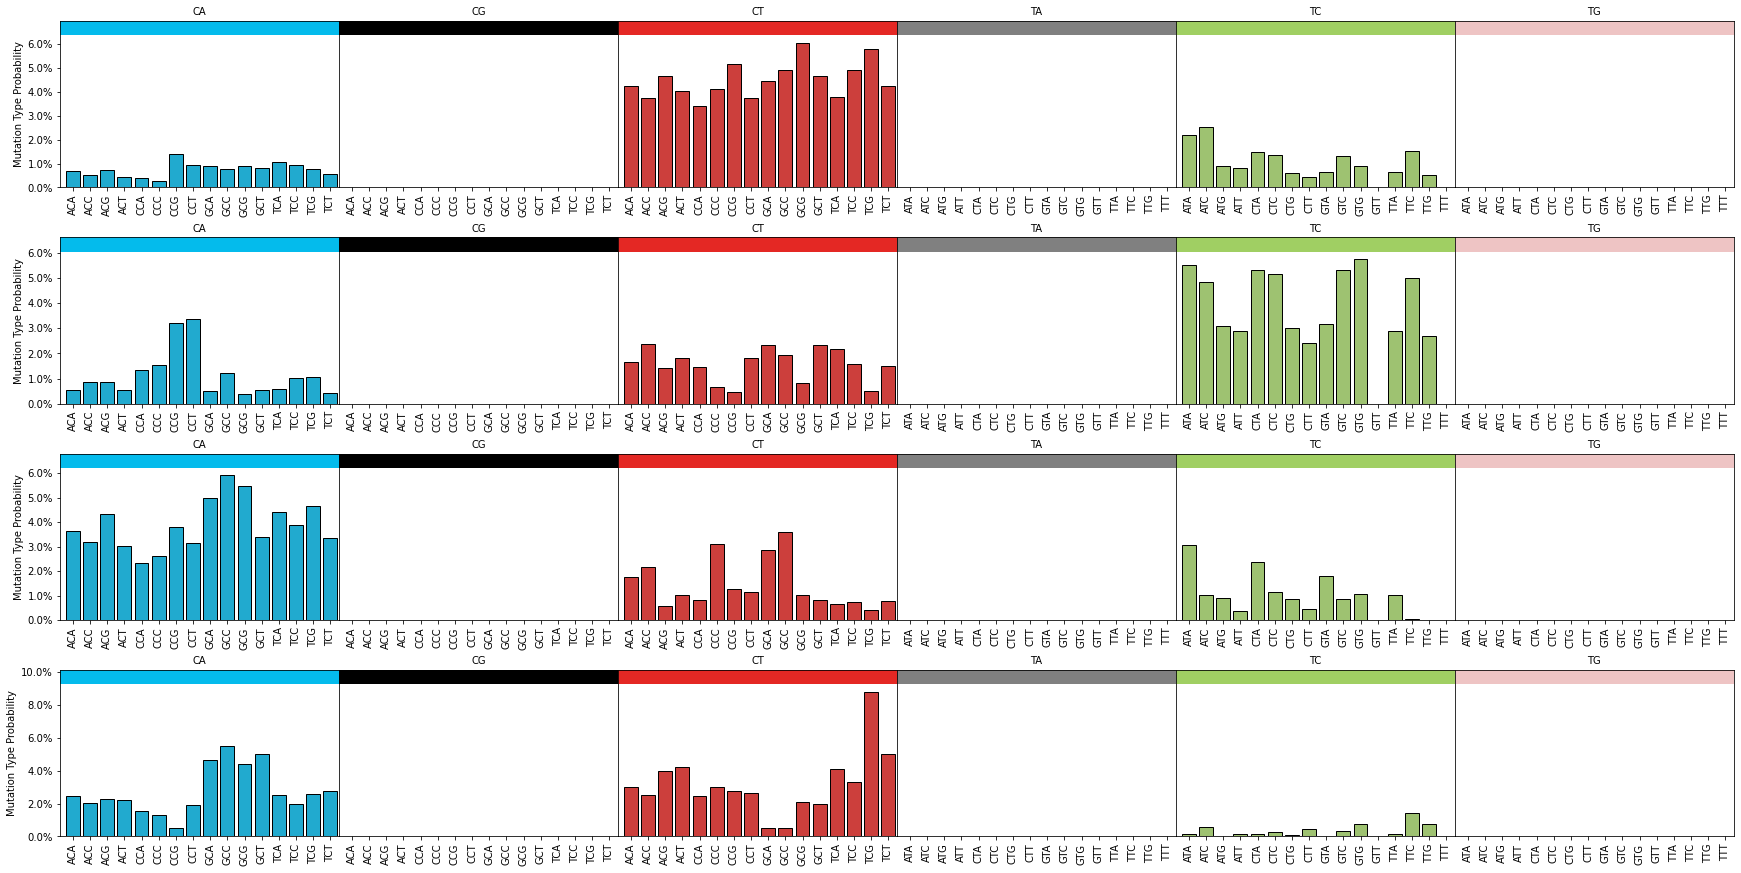

In [143]:
sig_val.plot_signature("Nucleotide",sig_val.sig_vis.signatures,comparableY=False,plot_size=(30,15),traditional=False)

/home4/2191618l/Github/Signatures_Julia/Resources/Python/MutationalSignatures/SignatureVisualiser.py:220: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bar_plot_data[time_point] = (data/data.sum())*100


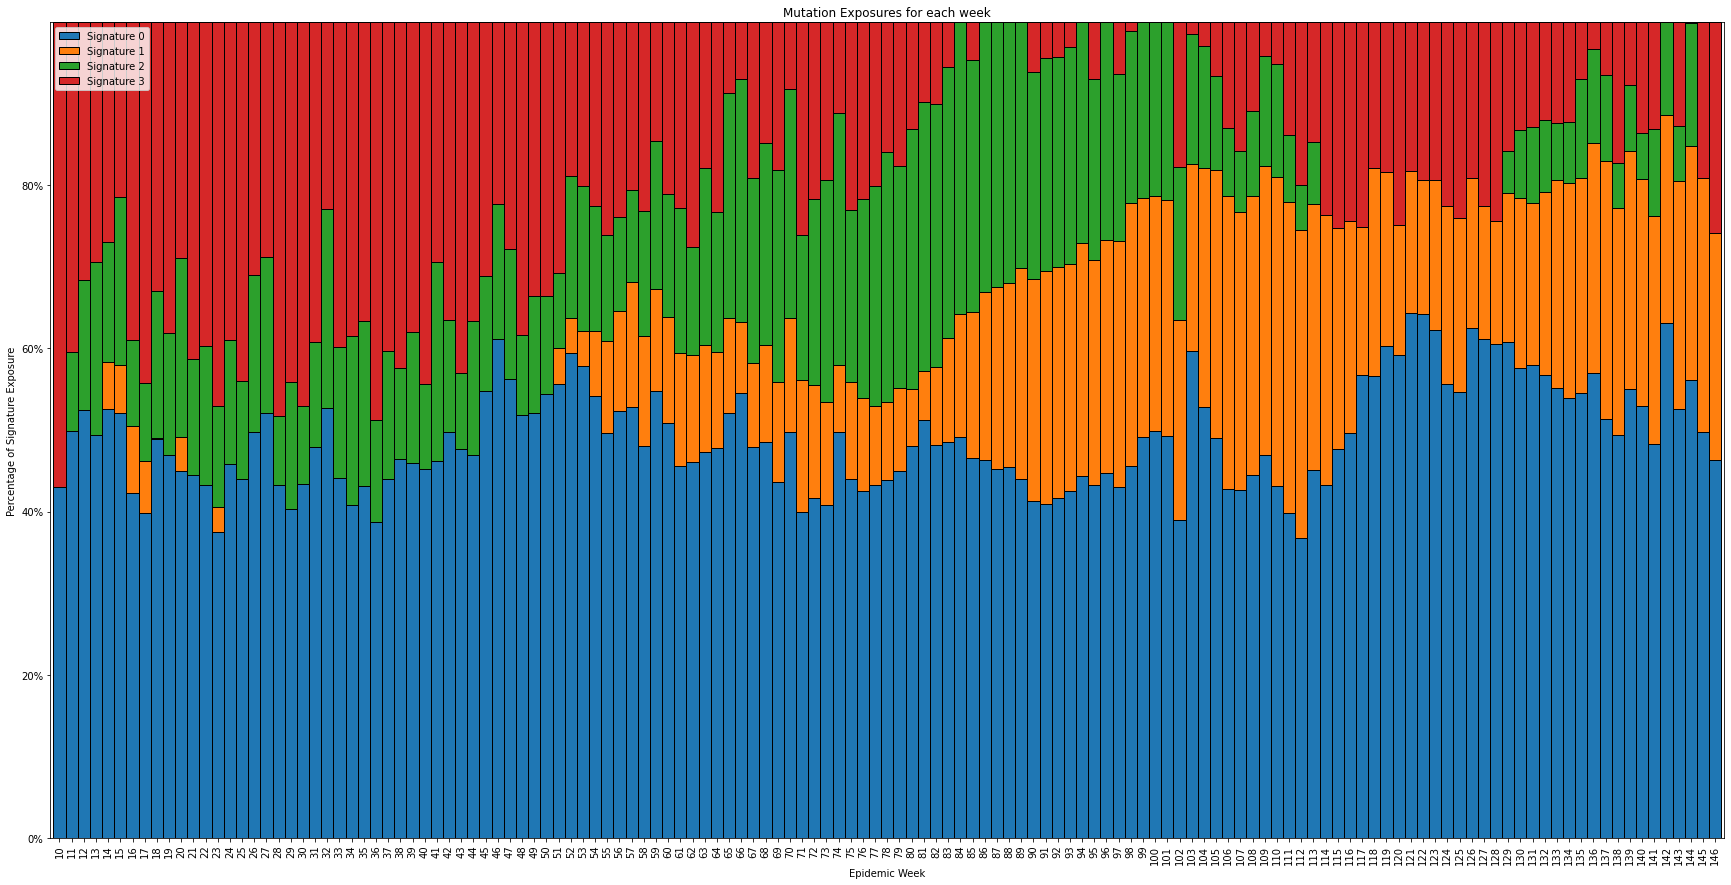

In [144]:
sig_val.sig_vis.weekly_exposures(plot_size=(30,15))

In [75]:
# raw_exposures = pd.DataFrame(sig_val.sig_vis.nmf.components_,columns=sig_val.sig_vis.metadata.epi_week.values).T.sort_index().T
# raw_exposures.index = ["Signature " +str(i) for i in raw_exposures.index]
# raw_exposures = raw_exposures.T.melt(value_vars=raw_exposures.T.columns,ignore_index=False)
# raw_exposures.index.name = "Epi_Week"
# raw_exposures.columns = ["Signature","Exposure"]
# raw_exposures.to_csv("Resources/Observable_Exports/Absolute_Signature_Exposure.csv")

In [138]:
cluster_sigs, cluster_exposures = sig_val.get_cluster(N)

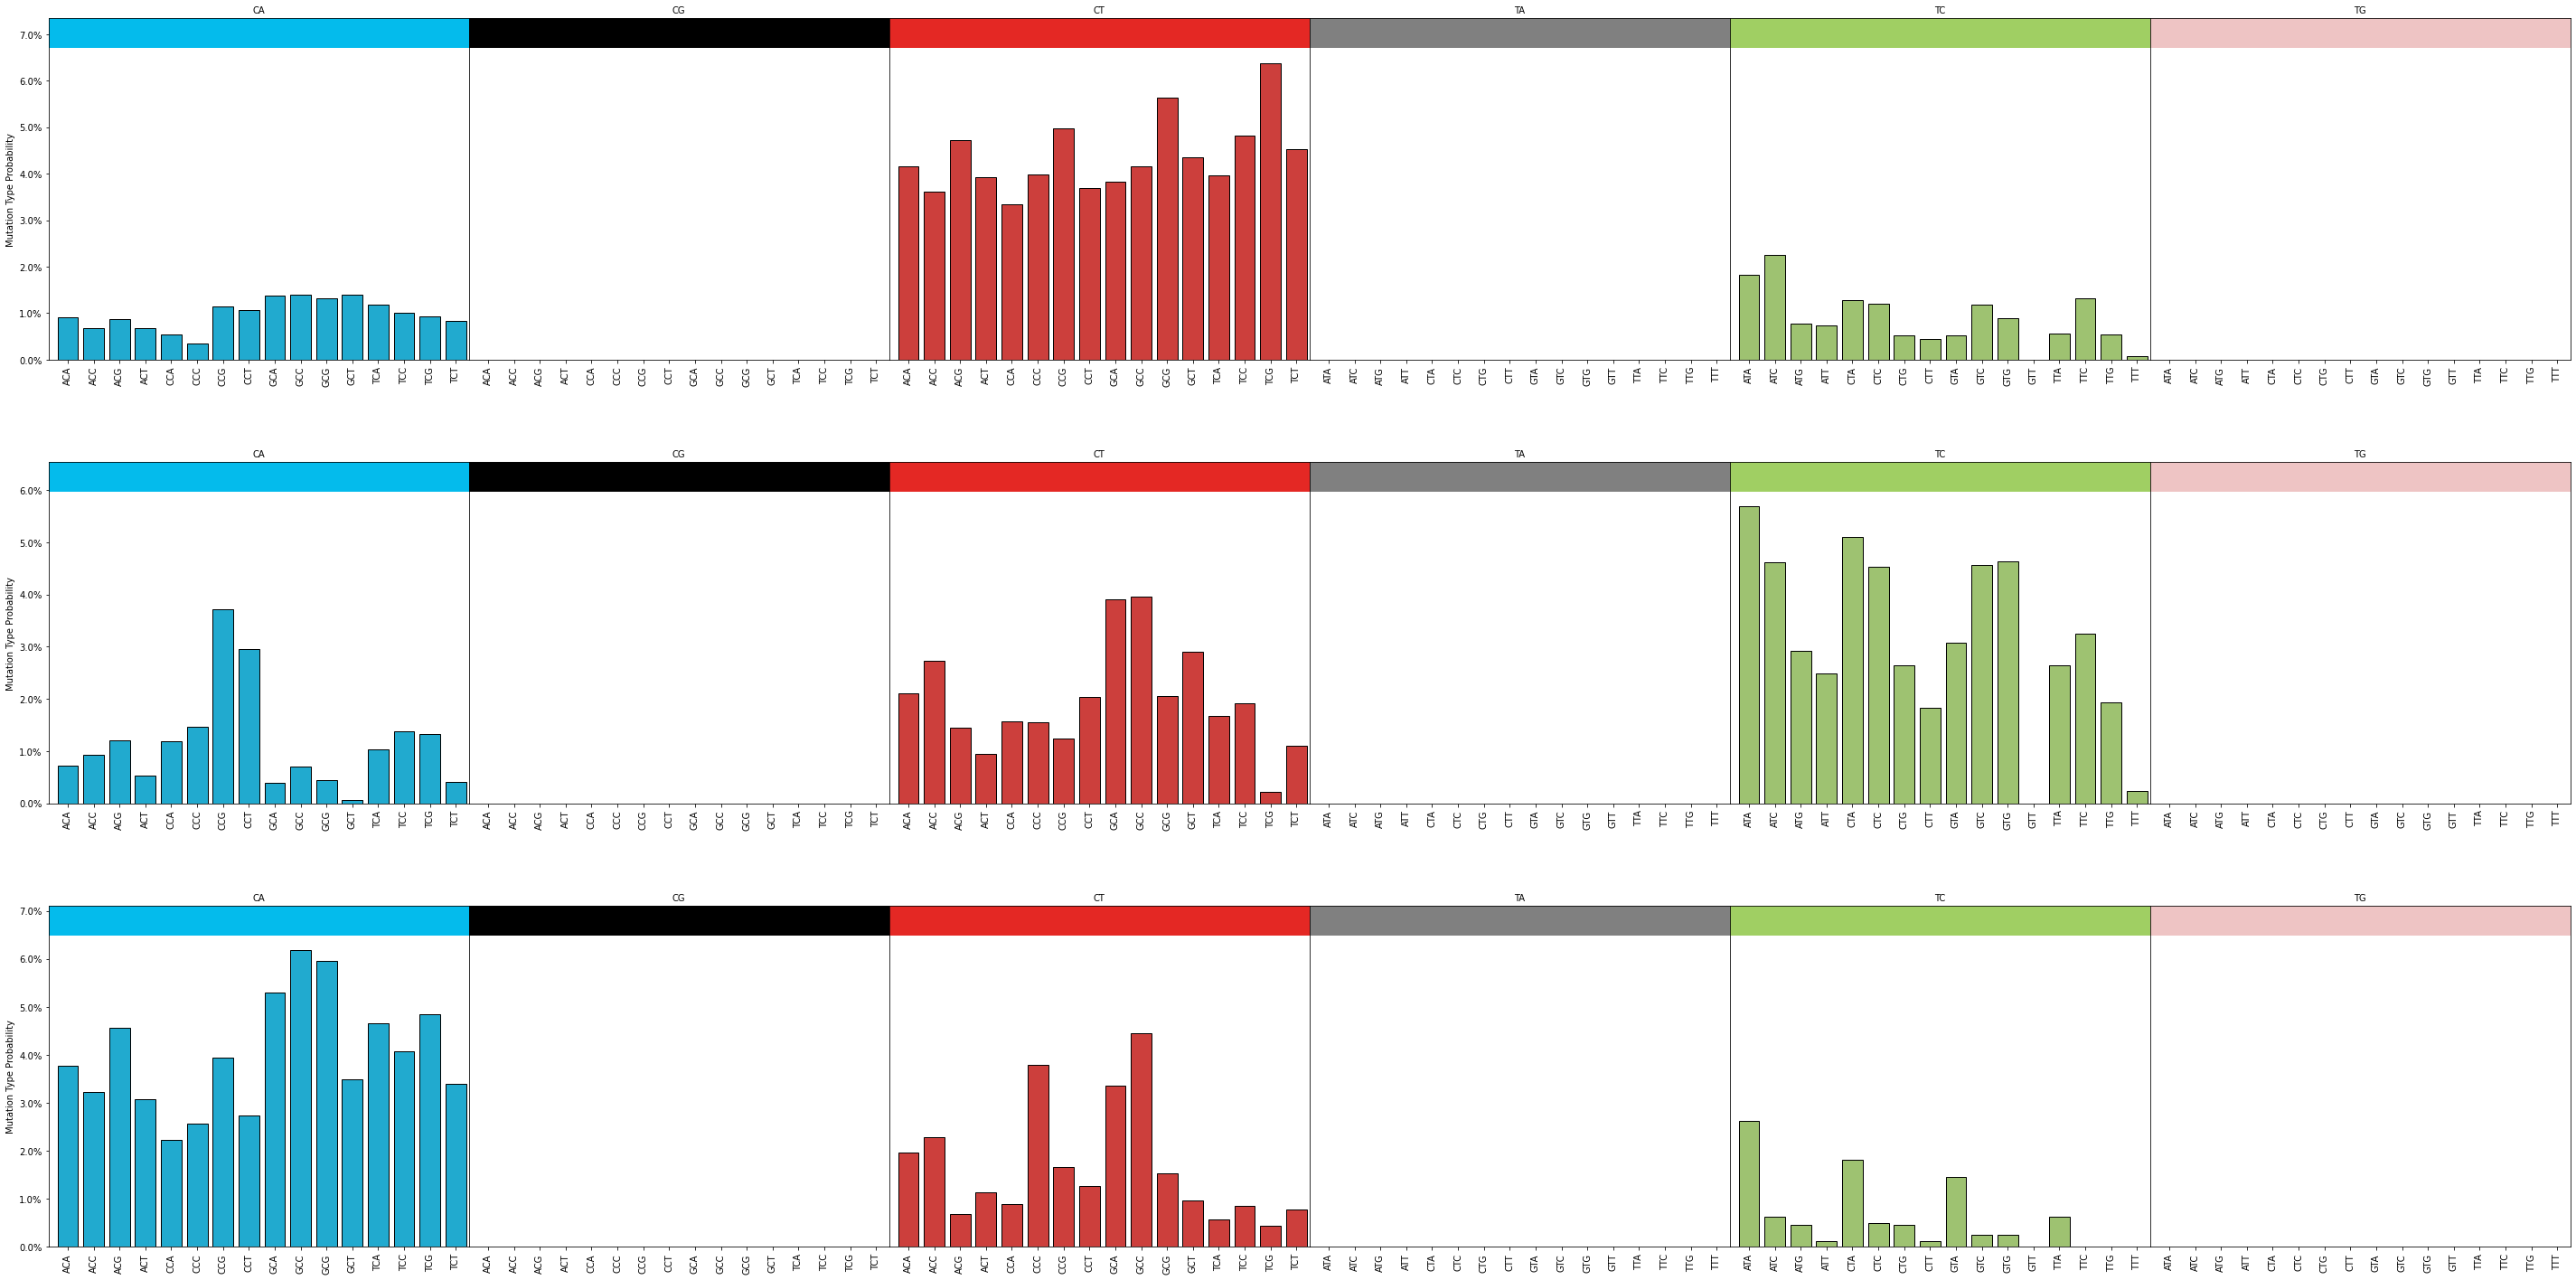

In [139]:
sig_val.plot_signature("Nucleotide",cluster_sigs,comparableY=False,traditional=False)

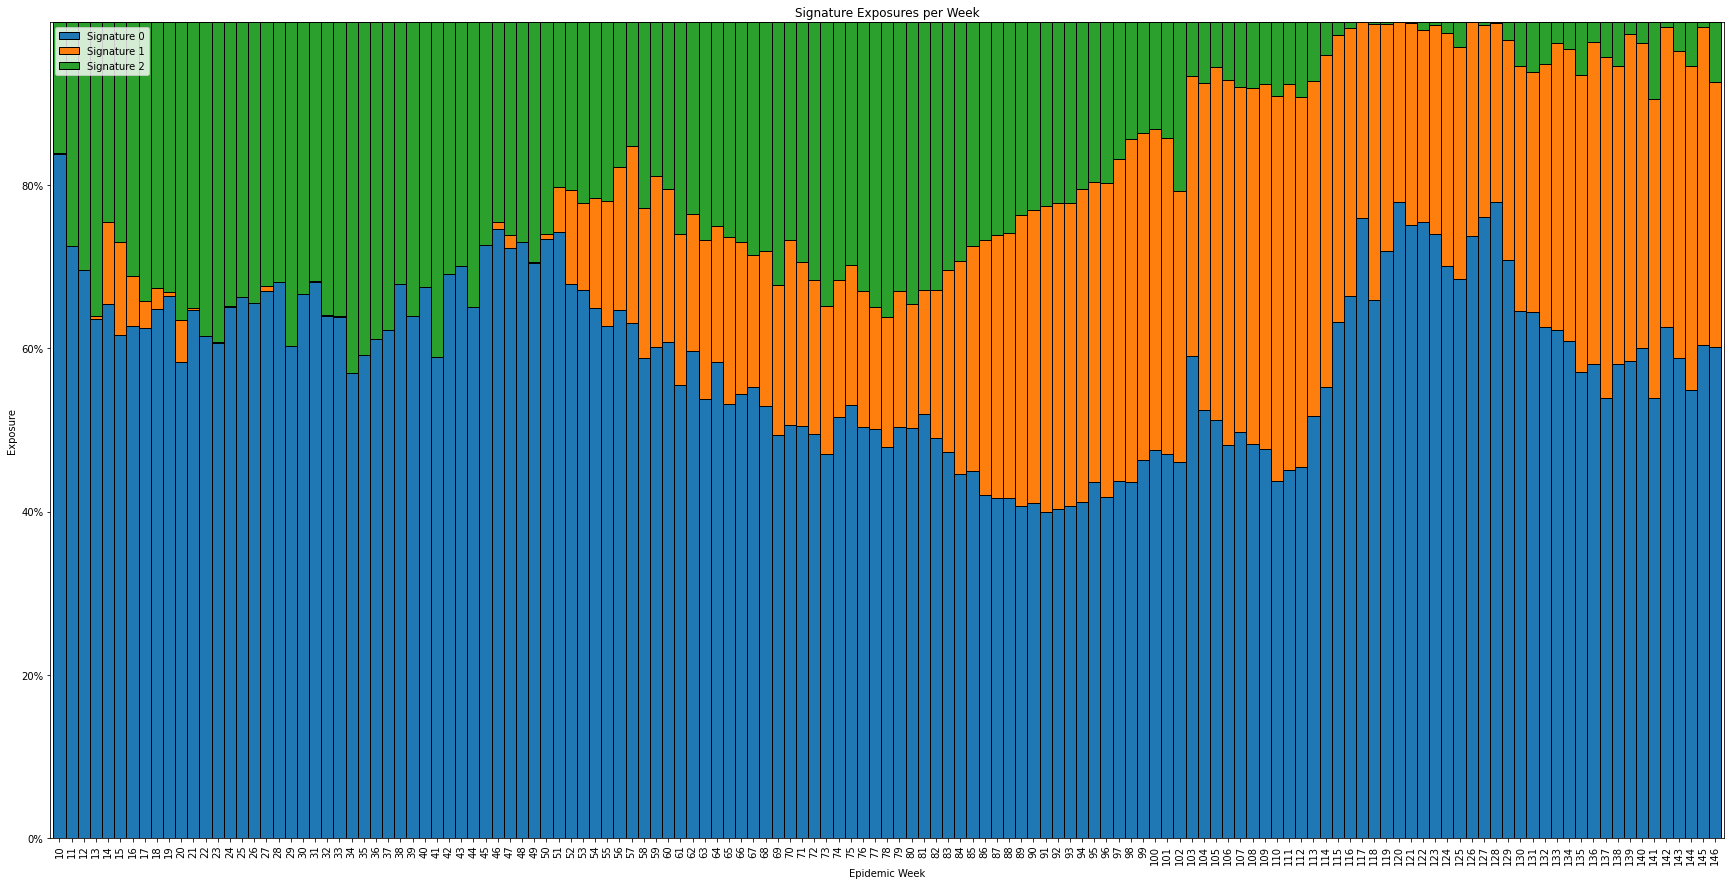

In [140]:
sig_val.plot_exposures(cluster_exposures,figsize=(30,15))

In [91]:
cluster_sigs.index.name="Mutation"
cluster_sigs.reset_index(inplace=True)


In [109]:
# cluster_sigs[["Sub","Context"]] = cluster_sigs.Mutation.str.split('-', expand=True)
cluster_sigs.to_csv(f'Resources/Observable_Exports/Reviewer_Normalised_Signatures/Traditional/N{N}/Clustered_Traditional_Final_Signatures_N{N}.csv',index=False)

# Export results to Observable

In [108]:
sig_val.sig_vis.export_to_observable()

         SUB CONTEXT  Signature_0  Signature_1
Mutation                                      
CA-ACA    CA     ACA     0.012025     0.006371
CA-ACC    CA     ACC     0.009528     0.008790
CA-ACG    CA     ACG     0.012555     0.011676
CA-ACT    CA     ACT     0.009261     0.004824
CA-CCA    CA     CCA     0.007242     0.012199
...       ..     ...          ...          ...
TG-GTT    TG     GTT     0.000000     0.000000
TG-TTA    TG     TTA     0.000000     0.000000
TG-TTC    TG     TTC     0.000000     0.000000
TG-TTG    TG     TTG     0.000000     0.000000
TG-TTT    TG     TTT     0.000000     0.000000

[96 rows x 4 columns]
            Signature  Exposure
Epi_Week                       
10        Signature 0  1.000000
11        Signature 0  1.000000
12        Signature 0  1.000000
13        Signature 0  1.000000
14        Signature 0  0.890900
...               ...       ...
142       Signature 1  0.321249
143       Signature 1  0.345530
144       Signature 1  0.379121
145       Sign

/home4/2191618l/Github/Signatures_Julia/Resources/Python/MutationalSignatures/SignatureVisualiser.py:548: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bar_plot_data[time_point] = (data/data.sum())*100
/home4/2191618l/Github/Signatures_Julia/Resources/Python/MutationalSignatures/SignatureVisualiser.py:607: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bar_plot_data[time_point] = data.copy()
